# NLP con librería NLTK

En la instalación de **NLTK** no se incluyen los recursos necesarios para trabajar en PLN (las reglas de puntuación o las stopwords).    
Por tanto, la primera vez que se ejecuten las funciones de librería se solicitará que se descarguen estos recursos.    
Esto es algo que se puede hacer simplemente indicando a la función ```download()``` de *NLTK* los recursos requeridos.    

## Análisis de sentimientos en inglés con NLTK.   

Para realizar análisis de sentimientos con NLTK es necesario importar lo siguiente:

In [1]:
# Importamos librerías
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('popular')

import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/jordi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/jordi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jordi/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/jordi/nltk_data...
[nltk_data] Downloading package punkt_tab to /home/jordi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jordi/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/jordi/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/jordi/nltk_data...
[nltk_data]    |   Unzipping corpora/gazette

### 1. Preprocesamiento de datos

Antes de poder realizar el análisis de sentimientos con NLTK, es necesario preprocesar los mensajes de texto para normalizar. 

Los pasos a llevar a cabo son:

- **Tokenización**: dividir el texto en palabras o frases más pequeñas llamadas tokens.
- **Eliminación de signos de puntuación y caracteres especiales**.
- **Conversión de texto a minúsculas** para normalizar el texto.
- **Eliminación de las stopwords** o palabras irrelevantes para el mensaje tales como “a”, “el”, “y”, etc.
- **Reducción de las palabras a su forma base (lemas)**.   

Estos pasos se pueden implementar con funciones de NLTK, tal como se muestra en el siguiente ejemplo:

In [3]:
# Procesado de texto
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

text = "I love the content on the Artificial Intelligence subjects, notebooks are fantastic."

# Tokenización
tokens = word_tokenize(text)

# Eliminación de signos de puntuación
tokens = [token for token in tokens if token not in string.punctuation]

# Conversión a minúsculas
tokens = [token.lower() for token in tokens]

# Eliminación de stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

# Lematización
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Reconstrucción del texto preprocesado
preprocessed_text = ' '.join(tokens)
preprocessed_text

'love content artificial intelligence subject notebook fantastic'

Proceso ejecutado:    

- En primer lugar, se debe tokenizar las frase mediante la función ```word_tokenize()```, lo que divide está en una lista de palabras y signos de puntuación.    
- Posteriormente, mediante con herramientas estándar de Python, se eliminan los tokens que estén en la lista de signos de puntuación (```string.punctuation```) y se convierten los todo el texto a minúsculas.    
- Una vez homogeneizado el texto, se eliminan las stopwords que incluye NLTK.    
- A la hora de importar las stopwords es necesario indicar el idioma con el que se está trabajando ya que estas son diferentes. 
- Finalmente se lematiza los tokens para eliminar plurales y derivaciones.

### 2. Extracción de características   

Una vez preprocesado el texto, es necesario extraer las características de este antes de poder entrenar un modelo.    
Lo más habitual es emplear la frecuencia de las palabras como características. En NLTK esto se implementa mediante la clase **FreqDist** y se muestra en el siguiente código:

In [4]:
from nltk import FreqDist

features = {}
words = word_tokenize(preprocessed_text)
word_freq = FreqDist(words)

for word, freq in word_freq.items():
    features[word] = freq

features

{'love': 1,
 'content': 1,
 'artificial': 1,
 'intelligence': 1,
 'subject': 1,
 'notebook': 1,
 'fantastic': 1}

Obtenemos como resultado un diccionario con la palabra clave y el valor es el número de ocurrencias de cada una de estas.

## 3. Conjunto de datos de entrenamiento   

Para entrenar un modelo es necesario contar con un conjunto de datos de entrenamiento.   
A tal efecto, se crea una lista de tuplas con el mensaje y la etiqueta que se desea que le corresponda para el entrenamiento.    

A modo de ejemplo se puede probar con un listado de siete mensajes similar al siguiente:

In [5]:
training_data = [
    ("I love the content on the Artificial Intelligence subjects, notebooks are fantastic.", "positive"),
    ("The code does not work, it gave me an error when executing it.", "negative"),
    ("I love this product!", "positive"),
    ("This movie was terrible.", "negative"),
    ("The weather is nice today.", "positive"),
    ("I feel so sad about the news.", "negative"),
    ("It's just an average book.", "neutral"),
    ("I don´t like milk.", "negative")
]

### Factorización del código

Se puede factorizar el código anterior para facilitar su uso a la hora de entrenar un modelo y que, globalmente, resulte más modular.    

Para ello se pueden crear dos funciones:    
- ```preprocess_text()``` para el preprocesado de texto y 
- ```extract_features()``` para la extracción de características.

In [6]:
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def preprocess_text(text):
    """
    Realiza el preprocesamiento básico de un texto en inglés utilizando NLTK.

    Args:
        text (str): El texto a ser preprocesado.

    Returns:
        str: El texto preprocesado.
    """
    # Tokenización
    tokens = word_tokenize(text)

    # Eliminación de signos de puntuación
    tokens = [token for token in tokens if token not in string.punctuation]

    # Conversión a minúsculas
    tokens = [token.lower() for token in tokens]

    # Eliminación de stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Reconstrucción del texto preprocesado
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


def extract_features(text):
    """
    Extrae las características del texto utilizando NLTK y devuelve un diccionario de características.

    Args:
        text (str): El texto del cual extraer características.

    Returns:
        dict: Un diccionario que representa las características extraídas del texto.
    """
    features = {}
    words = word_tokenize(text)
    word_freq = FreqDist(words)

    for word, freq in word_freq.items():
        features[word] = freq

    return features

## 4. Entrenamiento del modelo.   

El análisis de sentimientos con NLTK se puede realizar usando un clasificador basado en Naive Bayes.    
NLTK proporciona una clase en la que se implementa este tipo de clasificadores.     

Empleando esta clase y las funciones creadas en la sección anterior se puede entrenar un modelo con los datos de ejemplo, tal como se muestra a continuación:

In [7]:
from nltk.classify import NaiveBayesClassifier

# Preprocesamiento de los datos de entrenamiento
preprocessed_training_data = [(preprocess_text(text), label) for text, label in training_data]

# Extracción de características de los datos de entrenamiento
training_features = [(extract_features(text), label) for text, label in preprocessed_training_data]

# Entrenamiento del clasificador Naive Bayes
classifier = NaiveBayesClassifier.train(training_features)

## 5. Clasificación de nuevos textos.

Una vez que el modelo está entrando, este se puede usar para clasificar nuevos textos.    
Simplemente es necesario preprocesar y extraer las características de la nueva cadena de texto para realizar la predicción con el clasificador.

In [9]:
# Nuevo texto para clasificar
# new_text = "I really enjoy the concert" # positivo
new_text = "The concert was terrible"     # negativo
# new_text = "I really love the concert"    # negativo

# Preprocesamiento del nuevo texto
preprocessed_text = preprocess_text(new_text)

# Extracción de características del nuevo texto
features = extract_features(preprocessed_text)

# Clasificación del nuevo texto
sentiment = classifier.classify(features)
print("Sentiment:", sentiment)

Sentiment: negative


## Análisis de sentimientos en español  

En este noteboook se ha explicado cómo hacer análisis de sentimiento en inglés. Si se usa el ejemplo para trabajar con texto en español, u otros idiomas, el resultado no será satisfactorio dado que se ha usado el listado de stopwords del inglés y un lematizador (*WordNetLemmatizer*) que no es adecuado para el español.

Por eso, para realizar análisis de sentimientos en español se dispone de otro notebook que usa la librería **spaCy**, la cúal dispone de las herramientas adecuadas para llevar a cabo correctamente esta tarea.   

##  Conclusiones.
NLTK es la librería de referencia para el procesado del lenguaje natural (PLN). Se trata de una librería que facilita el trabajo cuando se desea realizar análisis de sentimientos.    
Aunque, como ya hemos dicho, funciones clave como la lematización solamente funcionan en inglés, el uso de NLTK facilita comprender los pasos necesarios para realizar este tipo de análisis.

### Anexo. Extracción de información y visualización de análisis

Importamos librerías necesarias

In [10]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/jordi/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/jordi/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/jordi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/jordi/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/jordi/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_

True

In [11]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

Sentencia a analizar (en inglés):

In [12]:
ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

A continuación, aplicamos a la sentencia la tokenización de palabras y el etiquetado de partes del discurso.

In [13]:
# Tokenización - original
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent, lang='eng')
    return sent

In [14]:
# Tokenización - con perceptrón (opción más rápida y cargando menos datos)
from nltk.tag import PerceptronTagger
tagger = PerceptronTagger()

def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = tagger.tag(sent)
    return sent

Veamos lo que vamos a obtener:

In [15]:
sent = preprocess(ex)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

Obtenemos una lista de tuplas que contiene las palabras individuales de la frase y su parte de habla asociada.

Ahora implementaremos el troceado de frases nominales para identificar entidades con nombre utilizando una expresión regular que consiste en reglas que indican cómo deben trocearse las frases.

Nuestro patrón de troceado consiste en una regla, según la cual debe formarse una frase nominal, NP, siempre que el troceador encuentre un determinante opcional, DT, seguido de cualquier número de adjetivos, JJ, y después un sustantivo, NN.

In [16]:
pattern = 'NP: {<DT>?<JJ>*<NN>}' # NP: Noun Phrase (sustantivo)

### CHUNKING (Análisis sintáctico)   

Utilizando este patrón, creamos un analizador sintáctico por trozos y lo probamos con nuestra frase.

In [17]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


El resultado puede leerse como un árbol o una jerarquía con S como primer nivel, que denota la frase. También podemos visualizarlo gráficamente, usando el siguiente código:     

Nota: necesario instalar tkinter en terminal (apt-get install python3-tk)

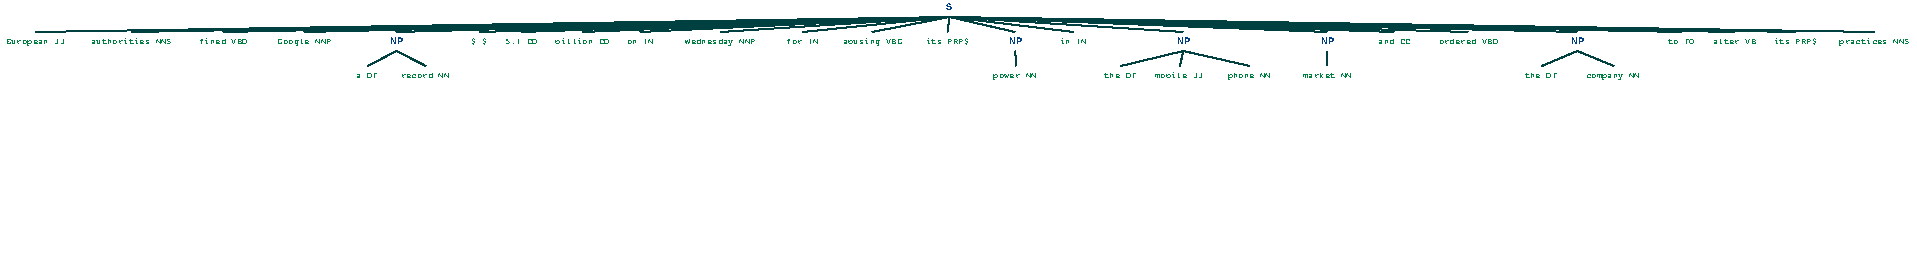

In [18]:
from nltk.draw.tree import TreeView

# Guarda el árbol como una imagen
TreeView(cs)._cframe.print_to_file('tree.ps')

# Mostrar el archivo en el notebook
from PIL import Image
from IPython.display import display

img = Image.open('tree.ps')
display(img)

In [19]:
cs.draw()

KeyboardInterrupt: 

**Etiquetas IOB**   

Las etiquetas IOB (Inside-Outside-Beginning) son un formato estándar para etiquetar secuencias de texto en tareas de procesamiento de lenguaje natural (NLP), especialmente en el reconocimiento de entidades nombradas (NER) y análisis sintáctico.

*Significado de las etiquetas IOB:*
- B = Beginning → Indica el comienzo de una entidad nombrada.
- I = Inside → Indica que la palabra es parte de la misma entidad nombrada que la palabra anterior.
- O = Outside → Indica que la palabra no forma parte de ninguna entidad nombrada.   

Tipos de entidades comunes en NER:
- PERSON → Persona
- ORG → Organización
- LOC → Ubicación física
- GPE → Entidad geopolítica (país, ciudad, etc.)
- DATE → Fecha
- MONEY → Cantidad de dinero   

Algunas etiquetas de posición (POS) comunes:   

| Etiqueta POS | Significado | Ejemplo |
|--------------|-------------|---------|
|NN|	Sustantivo singular|	dog, car, house|
|NNS|	Sustantivo plural|	dogs, cars, houses|
|NNP|	Sustantivo propio singular|	John, London|
|NNPS|	Sustantivo propio plural|	Americans, Germans|
|VB|	Verbo base|	be, have, do|
|VBD|	Verbo en pasado|	was, had, did|
|VBG|	Verbo en gerundio|	being, having, doing|
|VBN|	Verbo en participio pasado|	been, had, done|
|VBP|	Verbo en presente (excepto tercera persona)|	am, have, do|
|VBZ|	Verbo en presente (tercera persona)|	is, has, does|
|JJ|	Adjetivo|	big, good, blue|
|JJR|	Adjetivo comparativo|	bigger, better|
|JJS|	Adjetivo superlativo|	biggest, best|
|RB|	Adverbio|	quickly, silently|
|RBR|	Adverbio comparativo|	faster, better|
|RBS|	Adverbio superlativo|	fastest, best|
|PRP|	Pronombre personal|	I, you, he, she|
|PRP$|	Pronombre posesivo|	my, your, his|
|DT|	Determinante|	the, a, an|
|IN|	Preposición o conjunción subordinante|	in, on, that|
|CC|	Conjunción de coordinación|	and, but, or|
|CD|	Número cardinal|	one, two, 100|
|EX|	Existencial "there"|	there|
|FW|	Palabra extranjera|	c’est, je ne sais quoi|
|LS|	Símbolo de lista|	A), B), 1.|
|MD|	Verbo modal	| can, must |
|PDT|	Predeterminante	| all, both, half |
|POS|	Marca de posesión|	's |
|SYM|	Símbolo|	@, #, $ |
|TO|	"to" como preposición o infinitivo|	to |
|UH|	Interjección |	oh, oops, wow |
|WDT|	Pronombre relativo|	which, that|
|WP|	Pronombre wh|	who, what |
|WP$|	Pronombre posesivo wh |	whose|
|WRB|	Adverbio wh |	where, when |

En el siguiente bloque de código hacemos uso de las etiquetas IOB, que se han convertido en la forma estándar de representar estructuras de trozos en los archivos, y en este ejemplo también utilizaremos dicho formato.

In [20]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


En esta representación, hay un token por línea, cada uno con su etiqueta de parte de palabra y su etiqueta de entidad con nombre.    

A partir de este corpus de entrenamiento, podemos construir un etiquetador que sirva para etiquetar nuevas frases; y utilizar la función `nltk.chunk.conlltags2tree()` para convertir las secuencias de etiquetas en un árbol de trozos.   

Con la función `nltk.ne_chunk()`, podemos reconocer entidades con nombre utilizando un clasificador. El clasificador añade etiquetas de categoría como PERSONA, ORGANIZACIÓN y GPE.

In [21]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.chunk import ne_chunk

# Tokenizar, etiquetar y hacer el análisis de entidades nombradas
tokens = word_tokenize(ex)
pos_tags = pos_tag(tokens)
ne_tree = ne_chunk(pos_tags)
print(ne_tree)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/jordi/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/jordi/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/jordi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jordi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


Podemos comprobar que, lamentablemente, se identifica a GOOGLE como una entidad de tipo PERSON (Persona) 😂